# 1. COLLECTED DATA
Avaibility data quantity and quality control 

In [1]:
#Scikit-learn: a Python tool for data preprocessing, model training, and evaluation.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import os

# Use os for make a root
data_path = os.path.join("..", "..", "..", "backend", "data", "covid_processed.csv")
data = pd.read_csv(data_path, sep=',')

data.head(10)

,date,location,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,total_vaccinations,people_vaccinated
0,2020-01-05,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-06,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-07,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-08,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-09,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
5,2020-01-10,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6,2020-01-11,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
7,2020-01-12,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
8,2020-01-13,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
9,2020-01-14,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Informations about data type and length
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                429435 non-null  object 
 1   location            429435 non-null  object 
 2   total_cases         411804 non-null  float64
 3   new_cases           410159 non-null  float64
 4   total_deaths        411804 non-null  float64
 5   new_deaths          410608 non-null  float64
 6   icu_patients        39116 non-null   float64
 7   hosp_patients       40656 non-null   float64
 8   total_vaccinations  85417 non-null   float64
 9   people_vaccinated   81132 non-null   float64
dtypes: float64(8), object(2)
memory usage: 32.8+ MB


: 

In [ ]:
# Checking all the missing value in the data 
data.isnull().sum()

date                       0
location                   0
total_cases            17631
new_cases              19276
total_deaths           17631
new_deaths             18827
icu_patients          390319
hosp_patients         388779
total_vaccinations    344018
people_vaccinated     348303
dtype: int64

: 

<Axes: >

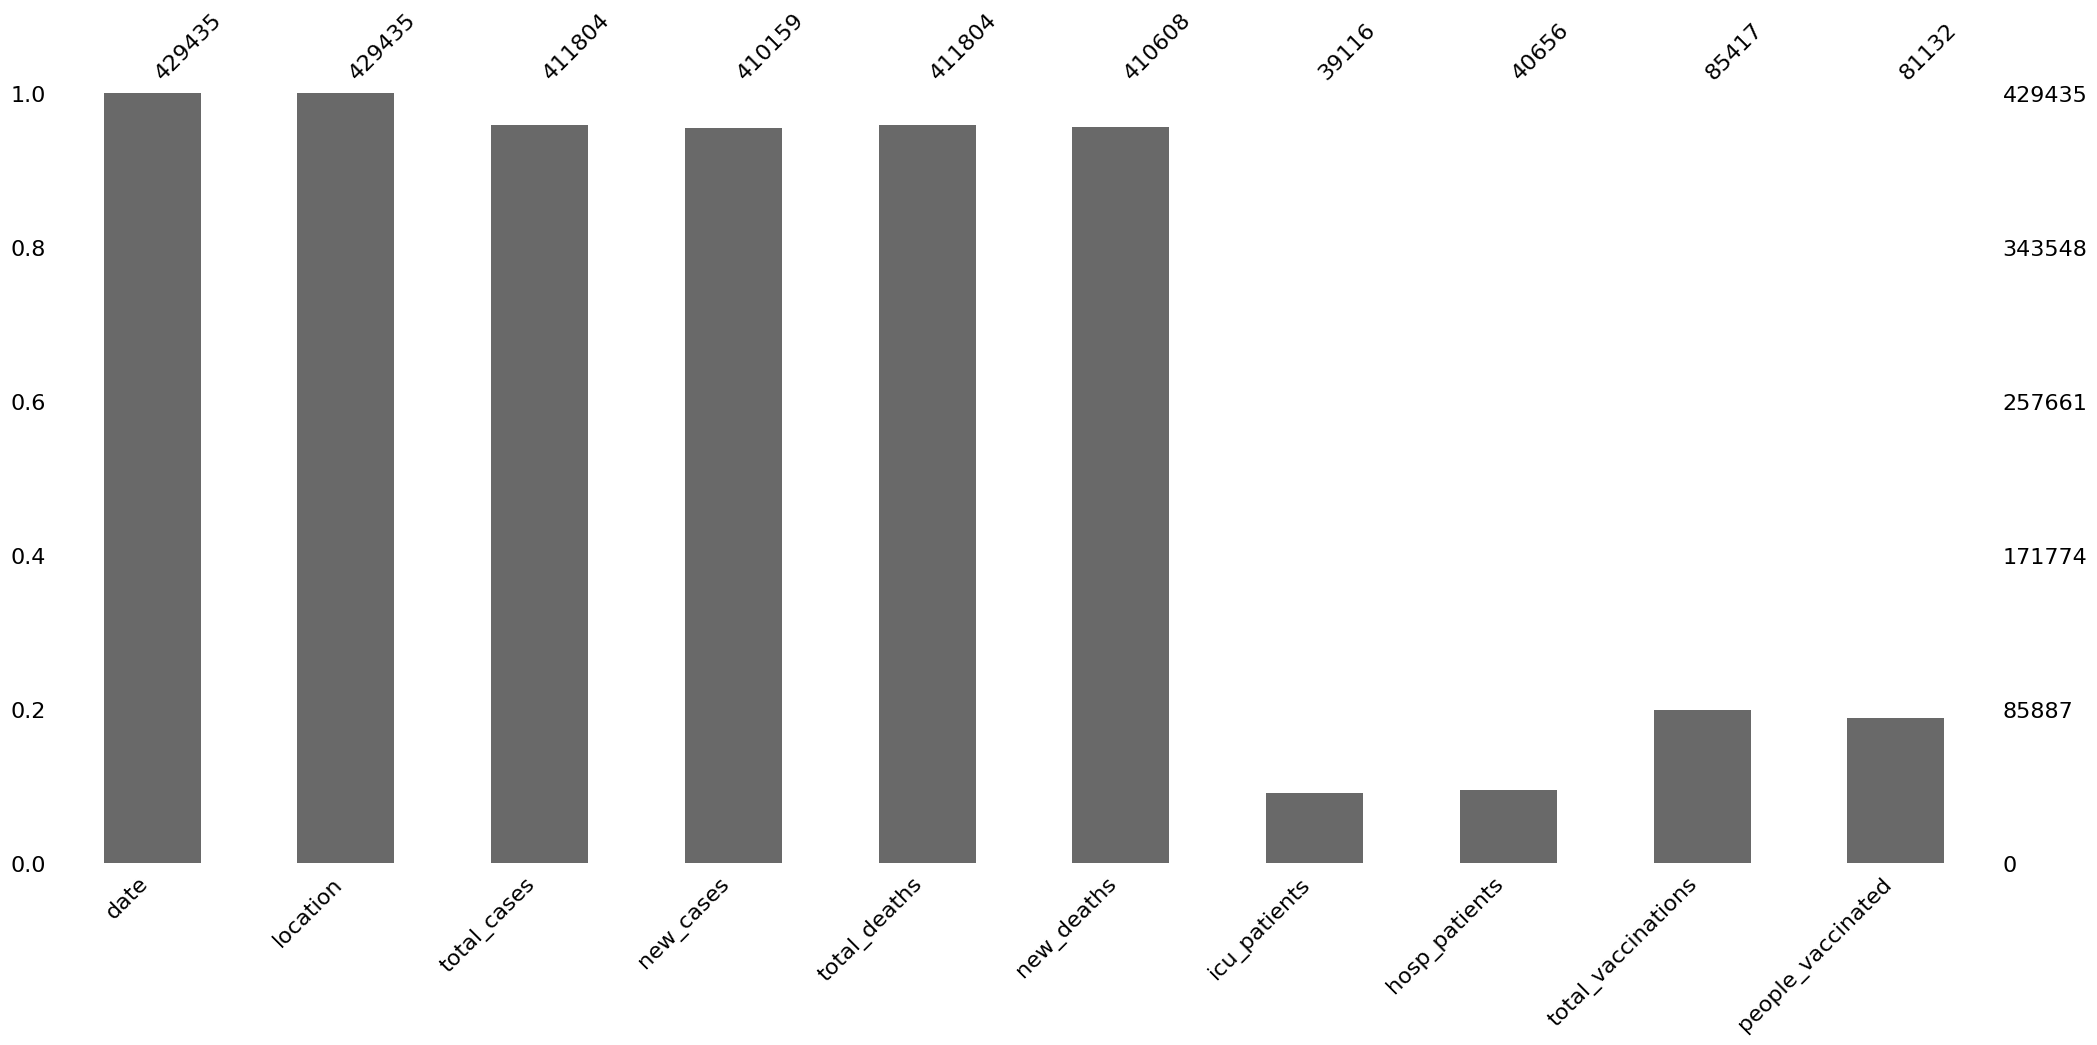

: 

In [ ]:
#comparatifvisualition on a diagram NaN values
msno.bar(data) 

In [ ]:
# Drop column not usable
dataClean = data.drop(columns=['icu_patients', 'hosp_patients', 'total_vaccinations', 'people_vaccinated'])

: 

In [ ]:
dataClean.head()

,date,location,total_cases,new_cases,total_deaths,new_deaths
0,2020-01-05,Afghanistan,0.0,0.0,0.0,0.0
1,2020-01-06,Afghanistan,0.0,0.0,0.0,0.0
2,2020-01-07,Afghanistan,0.0,0.0,0.0,0.0
3,2020-01-08,Afghanistan,0.0,0.0,0.0,0.0
4,2020-01-09,Afghanistan,0.0,0.0,0.0,0.0


: 

<Axes: >

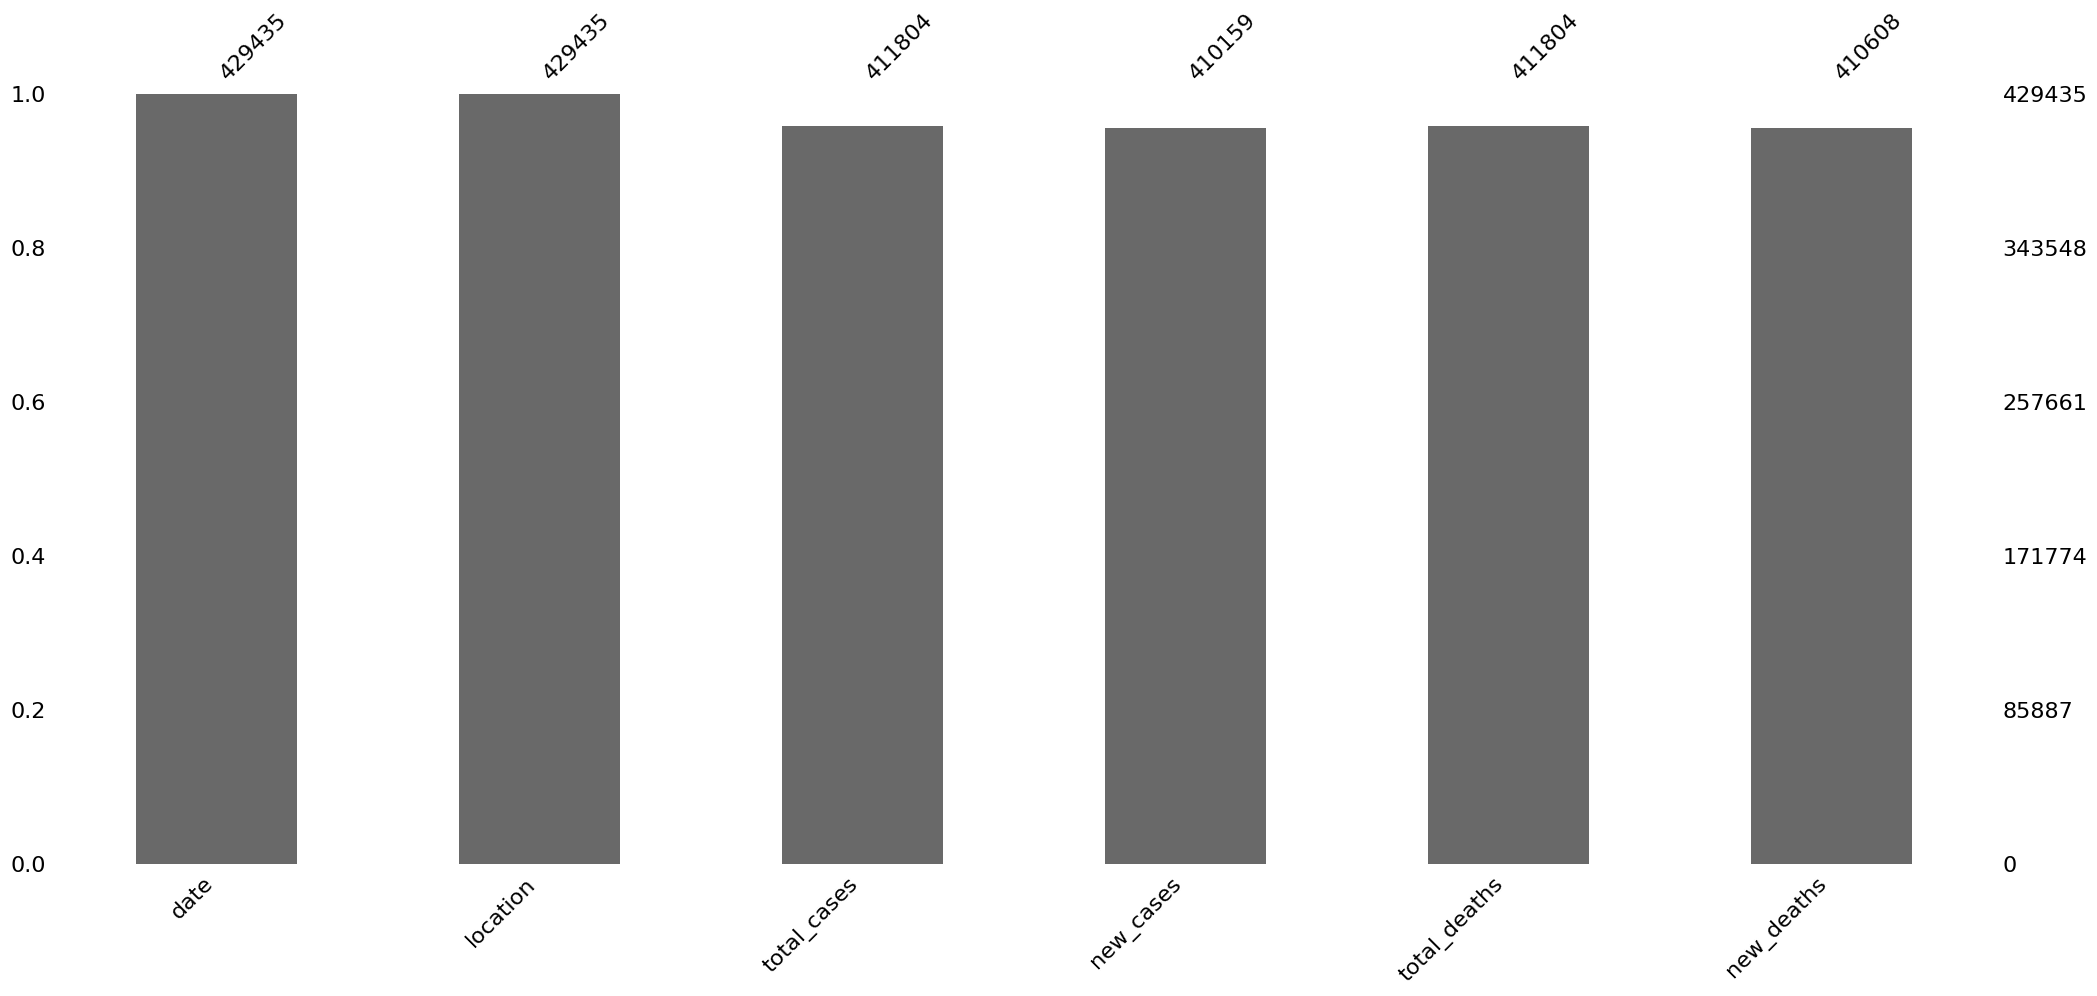

: 

In [ ]:
#comparatifvisualition on a diagram NaN values
msno.bar(dataClean) 

In [ ]:
# percent of missingg or null values
(dataClean.isnull().mean() * 100).sort_values(ascending=False)

new_cases       4.488689
new_deaths      4.384133
total_cases     4.105627
total_deaths    4.105627
location        0.000000
date            0.000000
dtype: float64

: 

In [ ]:
# Encodage
dataClean["date"] = pd.to_datetime(dataClean["date"], errors='coerce')

dataClean["location_encoded"] = LabelEncoder().fit_transform(dataClean["location"])
dataClean["day"] = dataClean["date"].dt.day
dataClean["month"] = dataClean["date"].dt.month
dataClean["year"] = dataClean["date"].dt.year

# Phase 0 = épidémie "classique" ; Phase 1 = post-crise (baisse mortalité)
dataClean["epidemic_phase"] = dataClean["year"].apply(lambda y: 0 if y <= 2022 else 1)


X = dataClean[["total_cases", "location_encoded", "day", "month", "year", "total_deaths", "new_cases", "epidemic_phase"]]
y = dataClean["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

: 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

: 

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

: 

In [ ]:
print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))

Moyenne erreur pred et test : 14.49436023406071
Coefficient de qualité : 0.9598226675236474


: 

In [ ]:
print("Importances des features :", model.feature_importances_)

Importances des features : [5.93157852e-02 1.55513947e-01 6.56110314e-03 2.94578577e-02
 1.06877372e-01 6.24599650e-02 5.79477273e-01 3.36696294e-04]


: 

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux : {mae/mean_real:.2%}")

Erreur relative cas mondiaux : 20.52%


: 

## Split par date une semaine

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-07")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[["total_cases", "location_encoded", "day", "month", "year", "total_deaths", "new_cases", "epidemic_phase"]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



Moyenne erreur pred et test : 80.31724637681158
Coefficient de qualité : 0.8615420769792949


: 

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux pour une semaine : {mae/mean_real:.2%}")

Erreur relative cas mondiaux pour une semaine : 39.97%


: 

## Split par date deux semaines

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-14")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[["total_cases", "location_encoded", "day", "month", "year", "total_deaths", "new_cases", "epidemic_phase"]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



Moyenne erreur pred et test : 64.21487663280116
Coefficient de qualité : 0.9463292184645623


: 

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux pour deux semaines  : {mae/mean_real:.2%}")

Erreur relative cas mondiaux pour deux semaines  : 18.63%


: 

## Split par date un mois

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-31")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[["total_cases", "location_encoded", "day", "month", "year", "total_deaths", "new_cases", "epidemic_phase"]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



Moyenne erreur pred et test : 44.487929226736554
Coefficient de qualité : 0.99091184556411


: 

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative pour un mois : {mae/mean_real:.2%}")

Erreur relative pour un mois : 12.52%


: 

In [ ]:
dataClean['location'].value_counts().head(20)

location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
East Timor                       2688
Faroe Islands                    2068
Lithuania                        1684
Europe                           1684
Malaysia                         1684
World                            1684
Asia                             1684
India                            1682
Estonia                          1682
Czechia                          1682
Oceania                          1681
New Zealand                      1681
Argentina                        1678
Mexico                           1678
Italy                            1677
Name: count, dtype: int64

: 

## Split par date cas mondiaux 

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-07")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[["total_cases", "location_encoded", "day", "month", "year", "total_deaths", "new_cases", "epidemic_phase"]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))


Moyenne erreur pred et test : 80.31724637681158
Coefficient de qualité : 0.8615420769792949


: 

In [ ]:
print("Moyenne des décès réels :", y_test.mean())
print("Médiane des décès réels :", y_test.median())

Moyenne des décès réels : 200.9536231884058
Médiane des décès réels : 0.0


: 

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative split par date cas mondiaux 7 jours janvier 2021 : {mae/mean_real:.2%}")

Erreur relative split par date cas mondiaux 7 jours janvier 2021 : 39.97%


: 

## Exprimer au modèle la tendance ascendante et descandante des varations

In [ ]:
# Ajouter features pour apprendre au modèle l'indicateur des tendances de variations éppidémique
dataClean['days_since_start'] = (dataClean['date'] - dataClean['date'].min()).dt.days
dataClean['new_cases_rolling7'] = dataClean['new_cases'].rolling(window=7).mean()
dataClean['trend_new_cases'] = dataClean['new_cases'].diff(periods=7)

: 

In [ ]:
# Ajoute les nouvelles colonnes dans X
X = dataClean[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases", 
    "epidemic_phase"
]]


# Supprimer toutes les lignes où X ou y contient NaN (important à cause des rolling/diff)
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

# Split, entraînement et prédiction comme avant
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))

Moyenne erreur pred et test : 77.9836811594203
Coefficient de qualité : 0.87177012426084


: 

In [ ]:
print("Moyenne des décès réels :", y_test.mean())
print("Médiane des décès réels :", y_test.median())

Moyenne des décès réels : 200.9536231884058
Médiane des décès réels : 0.0


: 

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features : {mae/mean_real:.2%}")

Erreur relative cas mondiaux avec nouvelles features : 38.81%


: 

## Split par date une semaine nouvelles features

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-07")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases", 
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



Moyenne erreur pred et test : 77.9836811594203
Coefficient de qualité : 0.87177012426084


: 

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features : {mae/mean_real:.2%}")

Erreur relative cas mondiaux avec nouvelles features : 38.81%


: 

## Split par date deux semaines nouveau DataFrame

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-14")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases", 
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



Moyenne erreur pred et test : 69.86265602322206
Coefficient de qualité : 0.9388681275336339


: 

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features : {mae/mean_real:.2%}")

Erreur relative cas mondiaux avec nouvelles features : 20.27%


: 

## Split par date 1 mois nouveau DataFrame

In [ ]:
# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-02-01")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases", 
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



Moyenne erreur pred et test : 23.499041269841275
Coefficient de qualité : 0.9949098063710058


: 

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features : {mae/mean_real:.2%}")

Erreur relative cas mondiaux avec nouvelles features : 9.76%


: 

## Split année 2021

In [ ]:

# Exemple pour filtrer sur une semaine
data_short = dataClean[(dataClean["date"] >= "2021-01-01") & (dataClean["date"] <= "2021-01-14")]
# Puis tu refais X, y, split, etc. sur data_short

X = dataClean[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases", 
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



Moyenne erreur pred et test : 69.86265602322206
Coefficient de qualité : 0.9388681275336339


: 

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features année 2021 : {mae/mean_real:.2%}")

Erreur relative cas mondiaux avec nouvelles features année 2021 : 20.27%


: 

In [ ]:
# Analyse sur les 3 mois avec le plus de décès

dataClean['month_year'] = dataClean['date'].dt.to_period('M')
top_months = dataClean.groupby('month_year')['new_deaths'].sum().sort_values(ascending=False).head(3).index

for period in top_months:
    start = period.start_time
    end = period.end_time
    data_short = dataClean[(dataClean["date"] >= start) & (dataClean["date"] <= end)]

    X = data_short[[
        "total_cases", "location_encoded", "day", "month", "year",
        "total_deaths", "new_cases", "days_since_start", "new_cases_rolling7", "trend_new_cases", "epidemic_phase"
    ]]
    y = data_short["new_deaths"]

    Xy = pd.concat([X, y], axis=1).dropna()
    X = Xy[X.columns]
    y = Xy[y.name]

    if len(X) > 0 and len(y.unique()) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"\nPériode : {period}")
        print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
        print("Coefficient de qualité :", r2_score(y_test, y_pred))
        print(f"Erreur relative : {mean_absolute_error(y_test, y_pred)/y_test.mean():.2%}")
    else:
        print(f"\nPériode : {period} -- Pas assez de données pour entraîner le modèle.")


Période : 2021-01
Moyenne erreur pred et test : 46.32468545216252
Coefficient de qualité : 0.9892879946182924
Erreur relative : 13.04%

Période : 2021-05
Moyenne erreur pred et test : 34.88040026246719
Coefficient de qualité : 0.9761291702443037
Erreur relative : 14.33%

Période : 2020-12
Moyenne erreur pred et test : 62.484364351245084
Coefficient de qualité : 0.9580046932741888
Erreur relative : 20.91%


: 

## Split sur l'année 2022 nouveau DataFrame

In [ ]:
#filtrer sur 2022
data_short = dataClean[(dataClean["date"] >= "2022-01-01") & (dataClean["date"] <= "2022-12-31")]
# Puis tu refais X, y, split, etc. sur data_short

X = data_short[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases",
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux avec nouvelles features année 2022 : {mae/mean_real:.2%}")

Moyenne erreur pred et test : 10.745907090736923
Coefficient de qualité : 0.9576746152270582
Erreur relative cas mondiaux avec nouvelles features année 2022 : 21.50%


: 

## Split sur l'année 2023 nouveau DataFrame

In [ ]:
#filtrer sur 2023
data_short = dataClean[(dataClean["date"] >= "2023-01-01") & (dataClean["date"] <= "2023-12-31")]
# Puis tu refais X, y, split, etc. sur data_short

X = data_short[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases",
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.loc[X_train.index]

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))



mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative  cas mondiaux année 2023 : {mae/mean_real:.2%}")

Moyenne erreur pred et test : 7.266508739391895
Coefficient de qualité : 0.7317033223809807
Erreur relative  cas mondiaux année 2023 : 48.66%


: 

In [ ]:
# Afficher la première et la dernière date de 2023 dans les données pour vérifier 
# si elles couvrent bien l'année complète
dates_2023 = dataClean[dataClean["year"] == 2023]["date"]
print("Première date 2023 :", dates_2023.min())
print("Dernière date 2023 :", dates_2023.max())
print("Nombre de jours de données en 2023 :", dates_2023.nunique())

Première date 2023 : 2023-01-01 00:00:00
Dernière date 2023 : 2023-12-31 00:00:00
Nombre de jours de données en 2023 : 365


: 

In [ ]:
# Vérifier l'équilibrage des données par année pour essayer de comprendre 
# L'erreur relative de l'année 2023
features = [
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases",
    "epidemic_phase"
]

target = "new_deaths"

# Supprimer les lignes où une des colonnes est NaN
data_filtered = dataClean[features + [target]].dropna()

# Ajouter une colonne 'year' si elle n'existe pas encore
if 'year' not in data_filtered.columns:
    data_filtered['year'] = pd.to_datetime(dataClean['date']).dt.year

# Compter le nombre de lignes par année
volume_par_annee = data_filtered.groupby('year').size()
print(volume_par_annee)


year
2020    88777
2021    89781
2022    89764
2023    88964
2024    52504
dtype: int64


: 

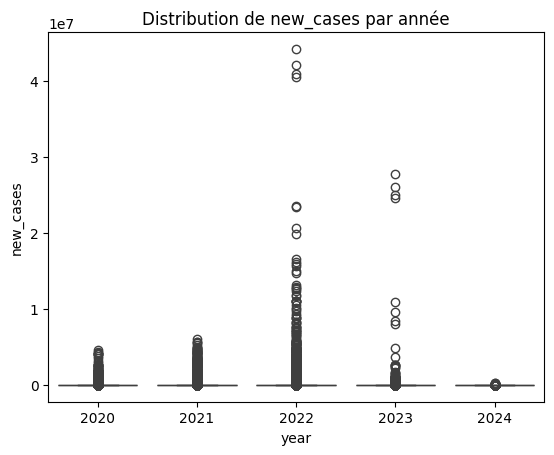

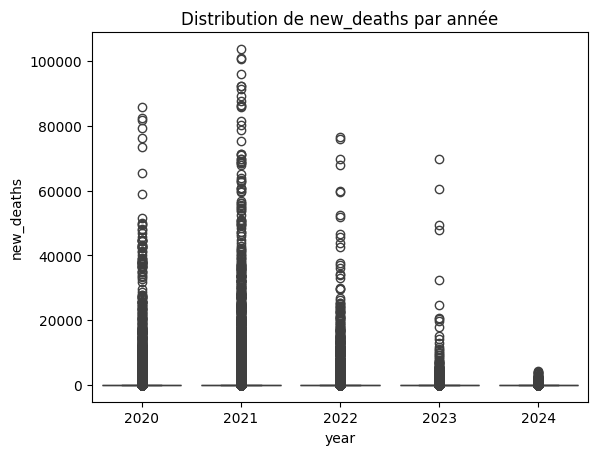

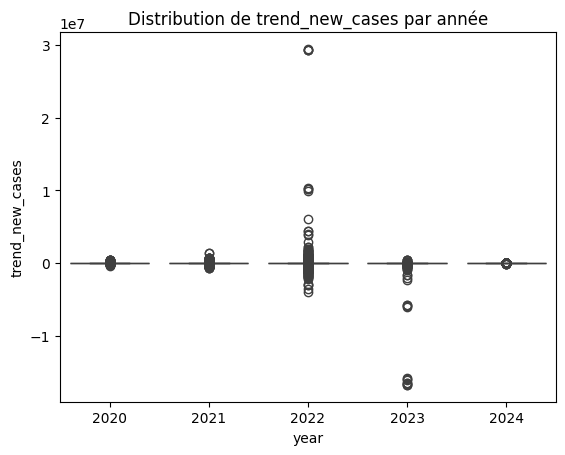

: 

In [ ]:
# Matrice pour vérfier les distributions de ces trois colonnes par année
for col in ["new_cases", "new_deaths", "trend_new_cases"]:
    sns.boxplot(data=dataClean, x=dataClean['year'], y=col)
    plt.title(f"Distribution de {col} par année")
    plt.show()

In [ ]:
vacc_cols = ["total_vaccinations", "people_vaccinated"]

for col in vacc_cols:
    data['year'] = pd.to_datetime(data['date']).dt.year
    yearly_counts = data[data[col].notna()].groupby("year")[col].count()
    print(f"\nPrésence de {col} par année :")
    print(yearly_counts)



Présence de total_vaccinations par année :
year
2020      379
2021    38490
2022    29708
2023    13084
2024     3756
Name: total_vaccinations, dtype: int64

Présence de people_vaccinated par année :
year
2020      373
2021    36777
2022    28300
2023    12314
2024     3368
Name: people_vaccinated, dtype: int64


: 

In [ ]:
## On comprend que 2023 est une année atypique au niveau de la variation cas de covid et décès, 
## Et on ne peut pas attester que ce soit grâce à la vaccination car on a trop peut de donnée vaccinale

: 

## Split sur l'année 2024 nouveau DataFrame

In [ ]:
#filtrer sur 2024
data_short = dataClean[(dataClean["date"] >= "2024-01-01") & (dataClean["date"] <= "2024-12-31")]
# Puis tu refais X, y, split, etc. sur data_short

X = data_short[[
    "total_cases",
    "location_encoded",
    "day",
    "month",
    "year",
    "total_deaths",
    "new_cases",
    "days_since_start",
    "new_cases_rolling7",
    "trend_new_cases",
    "epidemic_phase"
]]
y = data_short["new_deaths"]

# Supprimer toutes les lignes où X ou y contient NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna()
X = Xy[X.columns]
y = Xy[y.name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Moyenne erreur pred et test :", mean_absolute_error(y_test, y_pred))
print("Coefficient de qualité :", r2_score(y_test, y_pred))

Moyenne erreur pred et test : 0.8590334253880582
Coefficient de qualité : 0.912194797657868


: 

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mean_real = y_test.mean()
print(f"Erreur relative cas mondiaux année 2024 : {mae/mean_real:.2%}")

Erreur relative cas mondiaux année 2024 : 27.77%


: 